<a href="https://colab.research.google.com/github/pradhicsha6/Plant_Disease_Detection/blob/main/googlenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/summer project/data/train'
valid_path = '/content/drive/MyDrive/summer project/data/test'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/summer project/data/train/*')

In [6]:
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/summer project/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/summer project/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 246s 4s/step - loss: 1.9332 - accuracy: 0.7412 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 233s 4s/step - loss: 0.7374 - accuracy: 0.8903 - val_loss: 0.2095 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 233s 4s/step - loss: 0.6058 - accuracy: 0.8985 - val_loss: 0.4166 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 233s 4s/step - loss: 0.4706 - accuracy: 0.9267 - val_loss: 0.3926 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 233s 4s/step - loss: 0.3669 - accuracy: 0.9359 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 233s 4s/step - loss: 0.6929 - accuracy: 0.9083 - val_loss: 0.5191 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 233s 4s/step - loss: 0.5976 - accuracy: 0.9293 - val_loss: 0.7530 - val_accuracy: 0.7778
Epoch 8/20
61

In [13]:
pip install torchvision 

In [14]:
import matplotlib.pyplot as plt

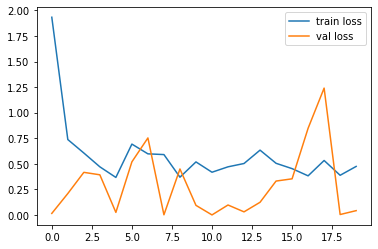

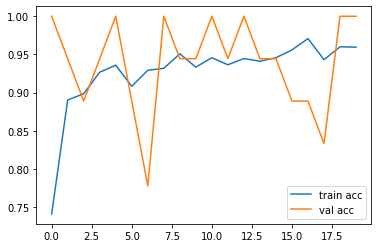

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('Model_Inception.h5')